In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:

data = pd.read_csv('boston_house_prices.csv')


In [4]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:

X = data.drop('MEDV', axis=1)
Y = data.MEDV


Affichons le nuage de points de chacunes des colonnes de notre dataset en fonction de celle target (MEDV)

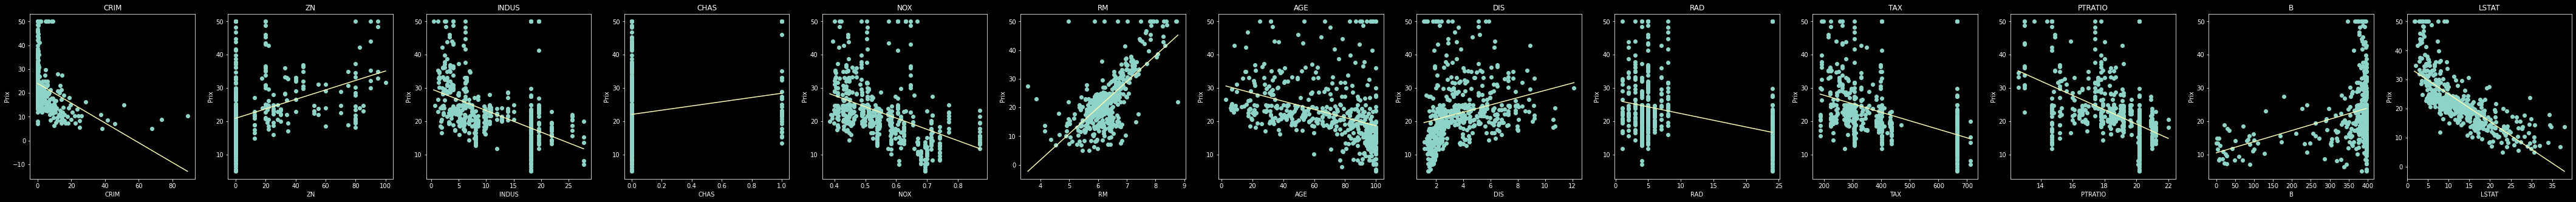

In [8]:
plt.figure(figsize=(75,5))
for i, col in enumerate(X.columns):
    plt.style.use(['dark_background', 'fast'])
    plt.subplot(1, 13, i+1)
    x = data[col]
    plt.plot(x, Y, 'o')
    # Création de la ligne de regression
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, Y, 1))(np.unique(x))) 
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prix')

### Fractionnement du dataset entre le trainning set et le Test set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Standardisation des données

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [12]:

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Construction du modèle
regressor = LinearRegression()

In [14]:
# J'adapte le modèle de regression linéaire à l'ensemble de données d'apprentissage.
regressor.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Faire de nouvelles prédictions
y_pred = regressor.predict(X_test)

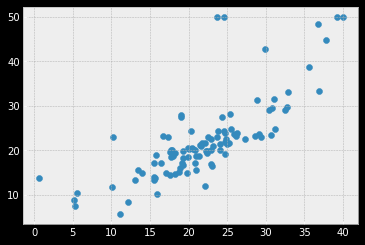

In [16]:
# Visualisation
plt.style.use("bmh")
plt.scatter(y_pred, Y_test)
plt.show()

In [17]:
regressor.predict(scaler.fit_transform(np.array([[0.17331, 0, 9.69, 0, 0.585, 5.707, 54, 2.3817, 6, 391, 19.2, 396.9, 12.01]])))

array([21.95939764])

## Evaluation et Validation

In [18]:
constante = regressor.intercept_
print("Constante : ", constante)

Constante :  21.959397643961946


In [19]:
coefficients = regressor.coef_
print("Coefficient : ", coefficients)

Coefficient :  [-1.21594235  0.98306627  0.03460499  0.59180091 -1.90899687  2.70414632
 -0.08814791 -3.04929638  2.16428225 -1.72794054 -2.13620193  0.81578697
 -3.1908764 ]


In [20]:
erreur_quadratique_moyenne = np.mean((y_pred - Y_test)**2)
print("L'erreur Quadratique Moyenne : ", erreur_quadratique_moyenne)

L'erreur Quadratique Moyenne :  33.44897999767655


In [21]:
[i for i in list(X)]


['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [22]:
[i for i in enumerate(X.columns)]

[(0, 'CRIM'),
 (1, 'ZN'),
 (2, 'INDUS'),
 (3, 'CHAS'),
 (4, 'NOX'),
 (5, 'RM'),
 (6, 'AGE'),
 (7, 'DIS'),
 (8, 'RAD'),
 (9, 'TAX'),
 (10, 'PTRATIO'),
 (11, 'B'),
 (12, 'LSTAT')]

In [23]:
nom = [i for i in list(X)]

On fait appel à OLS qui va permettre de recuperer le résumé statistique de tous les éléments

In [25]:
import statsmodels.api as sm

In [26]:
model = sm.OLS(Y_train, X_train)
result = model.fit()

In [27]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.305
Method:                 Least Squares   F-statistic:                              14.61
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                    8.18e-27
Time:                        00:08:46   Log-Likelihood:                         -1784.2
No. Observations:                 404   AIC:                                      3594.
Df Residuals:                     391   BIC:                                      3646.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

On crée un deuxieme modele pour le confronter au premier

le deuxieme modele est obtenu en retirant la colonne age des futures

In [28]:
X1 = X[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values

Y1 = Y

In [29]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [30]:
scaler1 = StandardScaler()


In [31]:
scaler1.fit(X1_train)
scaler1.fit(X1_test)

StandardScaler()

In [32]:
X1_train, X1_test = scaler1.fit_transform(X_train), scaler1.fit_transform(X_test)


In [33]:
# Construction du modèle
regressor1 = LinearRegression()

In [34]:
# J'adapte le modèle de regression linéaire à l'ensemble de données d'apprentissage.
regressor1.fit(X1_train, Y1_train)


LinearRegression()

In [35]:
# Faire de nouvelles prédictions
y_pred1 = regressor1.predict(X1_test)


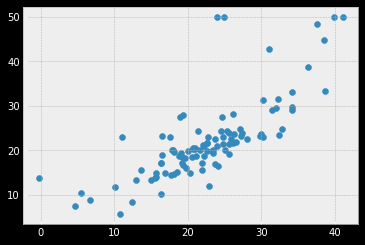

In [36]:
# Visualisation
plt.style.use("bmh")
plt.scatter(y_pred1, Y1_test)
plt.show()

## Evaluation

In [37]:
erreur_quadratique_moyenne = np.mean((y_pred1 - Y1_test)**2)
print("L'erreur Quadratique Moyenne : ", erreur_quadratique_moyenne)


L'erreur Quadratique Moyenne :  35.11642077929316


In [ ]:

model1 = sm.OLS(Y1_train, X1_train)
result = model.fit()
print(result.summary())